### EDA on .json Text Data

#### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
import cufflinks as cf

from plotly.offline import iplot

import textblob

In [2]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

#### Data Import & Preliminary Exploration

In [3]:
df = pd.read_json(path_or_buf='train.jsonl', lines=True)
df.head()

,text,label
0,The project will make a significant contributi...,1
1,"So in -- first of all, the segments, we are --...",0
2,Building a smarter and stronger energy grid th...,0
3,"Generally, first of all our Transmission depar...",0
4,"But for the most part, our challenge is showin...",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2117 non-null   object
 1   label   2117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.2+ KB


In [5]:
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2117 non-null   string
 1   label   2117 non-null   int64 
dtypes: int64(1), string(1)
memory usage: 33.2 KB


In [6]:
df.isnull().sum()

text     0
label    0
dtype: int64

#### Preprocessing Text

In [9]:
' '.join(df['text'].tolist())

'The project will make a significant contribution to the German and European hydrogen strategy and hence to achievement of the climate targets. So in -- first of all, the segments, we are -- we are more selective than we were in the past. Building a smarter and stronger energy grid that better serves customers is at the heart of our Advanced Grid Intelligence and Security initiative. Generally, first of all our Transmission department is very busy, both gas and electric transmission, I should say, meeting the needs of our on-network customers. But for the most part, our challenge is showing them how our funds work within the investment themes that they\'re already seeking. Our ambition is to be the preferred energy company for all stakeholders, and we have a disciplined three-phase strategy to meet that ambition. Our Environmentally Preferable Purchasing Guidelines, which we have formulated to enforce “green” purchasing, apply not only to parts and raw materials but also to packaging m

In [10]:
# Expanding Contractions
contractions = {"ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [11]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [12]:
df['text'] = df['text'].apply(lambda x: cont_to_exp(x))
df['text']

0       The project will make a significant contributi...
1       So in -- first of all, the segments, we are --...
2       Building a smarter and stronger energy grid th...
3       Generally, first of all our Transmission depar...
4       But for the most part, our challenge is showin...
                              ...                        
2112    The retirement age for non-executive directors...
2113    Responding proactively to the risks and opport...
2114    And so we have opportunities here, but be sure...
2115    The Fund recognises that environmental and soc...
2116    So again, I know we are not the only company o...
Name: text, Length: 2117, dtype: object

#### Feature Engineering

In [13]:
df.head()
# we're going to add length of text, word count, and average word length columns.
# also, we will use textblob to add sentiment polarity columns

,text,label
0,The project will make a significant contributi...,1
1,"So in -- first of all, the segments, we are --...",0
2,Building a smarter and stronger energy grid th...,0
3,"Generally, first of all our Transmission depar...",0
4,"But for the most part, our challenge is showin...",0


In [14]:
from textblob import TextBlob

In [15]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [17]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [18]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)

    return word_len/len(words)

In [19]:
df['avg_word_length'] = df['text'].apply(lambda x: get_avg_word_len(x))

In [20]:
df.head()

,text,label,polarity,text_length,word_count,avg_word_length
0,The project will make a significant contributi...,1,0.125000,142,22,5.500000
1,"So in -- first of all, the segments, we are --...",0,0.166667,94,21,3.523810
2,Building a smarter and stronger energy grid th...,0,0.450000,147,23,5.434783
3,"Generally, first of all our Transmission depar...",0,0.190000,162,25,5.520000
4,"But for the most part, our challenge is showin...",0,0.500000,131,23,4.739130


#### Exploring Variable Distributions

In [24]:
df['polarity'].iplot(kind = 'hist', xTitle = 'Polarity', yTitle = 'Count', title = 'Sentiment Polarity Distribution', bins = 50)
# most of the text entries have very neutral sentiment

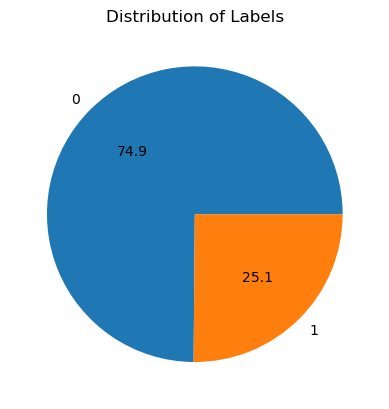

In [25]:
label_counts = df['label'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
label_counts
labels_dist = plt.pie(label_counts['count'], labels=label_counts['label'], autopct='%.1f')
plt.title("Distribution of Labels")
plt.show()

In [29]:
df['text_length'].iplot(kind = 'hist', xTitle = 'Text Length', yTitle = 'Count', title = "Distribution of Text Length", bins = 50)

In [34]:
df['word_count'].iplot(kind = 'hist', xTitle = 'Word Count', yTitle = 'Count', title = "Distribution of Word Count")

In [38]:
df['avg_word_length'].iplot(kind = 'hist', xTitle = 'Average Word Length', yTitle = 'Count', title = "Distribution of Average Word Length", bins = 50)

#### Distribution of Unigram, Bigram, and Trigram

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

##### Unigrams

In [65]:
words = get_top_n_words(df['text'], 20)
dfUni = pd.DataFrame(words, columns = ['Unigram','Frequency'])
dfUni = dfUni.set_index('Unigram')
dfUni.iplot(kind = 'bar', xTitle='Unigram', yTitle='Frequency', title = 'Top 20 Unigram Words')

##### Bigrams

In [72]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [77]:
words = get_top_n_words(df['text'], 20)
dfBi = pd.DataFrame(words, columns = ['Bigram','Frequency'])
dfBi = dfBi.set_index('Bigram')
dfBi.iplot(kind = 'bar', xTitle='Bigram', yTitle='Frequency', title = 'Top 20 Bigram Words')

##### Trigrams

In [78]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [79]:
words = get_top_n_words(df['text'], 20)
dfTri = pd.DataFrame(words, columns = ['Trigram','Frequency'])
dfTri = dfTri.set_index('Trigram')
dfTri.iplot(kind = 'bar', xTitle='Trigram', yTitle='Frequency', title = 'Top 20 Trigram Words')

##### Removing Stop Words for More Useful Distributions

##### Unigrams without Stop Words

In [93]:
def get_top_n_words(x, n):
    vec = CountVectorizer(stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [94]:
words = get_top_n_words(df['text'], 20)
dfUni = pd.DataFrame(words, columns = ['Unigram','Frequency'])
dfUni = dfUni.set_index('Unigram')
dfUni.iplot(kind = 'bar', xTitle='Unigram', yTitle='Frequency', title = 'Top 20 Unigram Words')

##### Bigrams without Stop Words

In [83]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [84]:
words = get_top_n_words(df['text'], 20)
dfBi = pd.DataFrame(words, columns = ['Bigram','Frequency'])
dfBi = dfBi.set_index('Bigram')
dfBi.iplot(kind = 'bar', xTitle='Bigram', yTitle='Frequency', title = 'Top 20 Bigram Words')

##### Trigrams without Stop Words

In [90]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [91]:
words = get_top_n_words(df['text'], 20)
dfTri = pd.DataFrame(words, columns = ['Trigram','Frequency'])
dfTri = dfTri.set_index('Trigram')
dfTri.iplot(kind = 'bar', xTitle='Trigram', yTitle='Frequency', title = 'Top 20 Trigram Words')